In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [37]:
img = cv2.imread('im__example.png', cv2.IMREAD_GRAYSCALE)

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

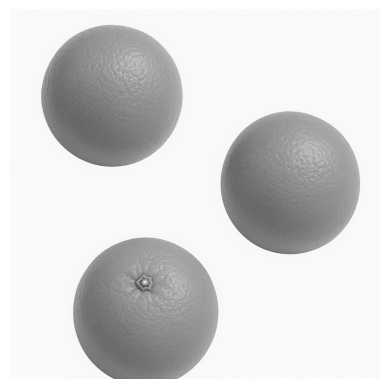

In [38]:
plt.imshow(img, cmap="gray")
plt.axis('off')

## Thresholding

In [39]:
#Using Threshold
_, thresh1 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV) 

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

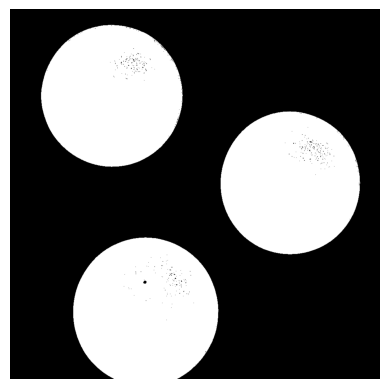

In [40]:
plt.imshow(thresh1, cmap="gray")
plt.axis('off')

In [66]:
#Using inRange
thresh2 = cv2.inRange(img, lowerb=50, upperb=200)

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

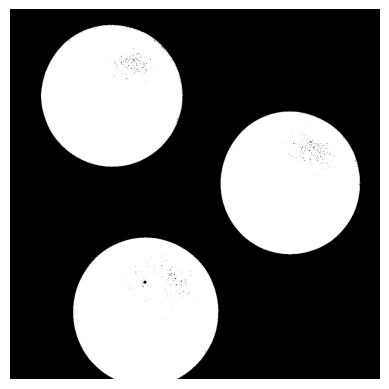

In [67]:
plt.imshow(thresh2, cmap="gray")
plt.axis('off')

## Morphology

In [52]:
#Structure Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
binary = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)


(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

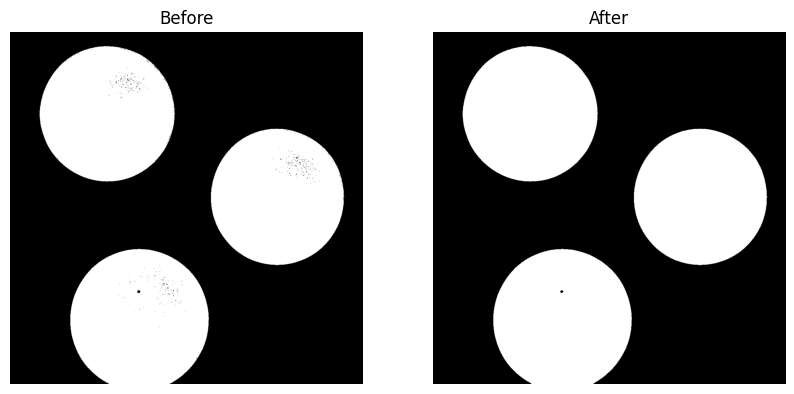

In [53]:
ax1 = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(thresh1, cmap="gray")
plt.title('Before')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(binary, cmap="gray")
plt.title('After')
plt.axis('off')

## Counting Objects

In [45]:
contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

Number of objects: 3


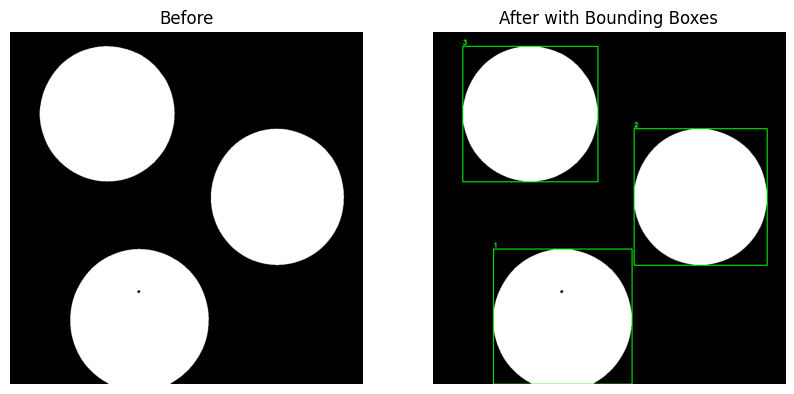

In [ ]:
count = 0
size = 70

binary_with_box = cv2.cvtColor(binary.copy(), cv2.COLOR_GRAY2BGR)  

for idx, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > size:
        count += 1
        x, y, w, h = cv2.boundingRect(contour) #get bounding box location
        cv2.rectangle(binary_with_box, (x, y), (x+w, y+h), (0, 255, 0), 2) #draw bounding box
        cv2.putText(binary_with_box, str(count), (x, y-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

print(f"Number of objects: {count}")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(binary, cmap="gray")
plt.title('Before')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(binary_with_box, cv2.COLOR_BGR2RGB))
plt.title('After with Bounding Boxes')
plt.axis('off')

plt.show()